# **1. 3D reconstruction and pose estimation from two images**

#### **(a) Projection onto the Essential Space**  

\begin{align*}
\| E - F \|^2_f & = \| U\Sigma_{\sigma}V^\top - U\Sigma V^\top \|^2_f \\
    & = \| \Sigma_{\sigma} - \Sigma \|^2_f && \text{since orthogonal matrices preserve norms}
\end{align*}

Since the essential matrix is of the form $E^* = \begin{bmatrix} \sigma & 0 & 0\\ 0 & \sigma & 0\\ 0 & 0 & 0 \end{bmatrix}$,  
then minimizing the above norm is equivalent to picking $\sigma$ equal to the largest singular value of $F$

#### **(b) Recovering the translation vector** Recall that $E = [t]_{\times}R$. Show that the translation vector $t$ is in the left null space o    f $E$.

\begin{equation}
\begin{bmatrix}
t_0 & t_1 & t_2
\end{bmatrix}
    \begin{bmatrix}
        0 & -t_{2} & t_{1} \\
        t_{2} & 0 & -t_{0} \\
        -t_{1} & t_{0} & 0
    \end{bmatrix}
    \times
    R \\
    = 0 \times R \\
    = 0
\end{equation}

#### **(c)-(f)**

Coded

#### **(g)**

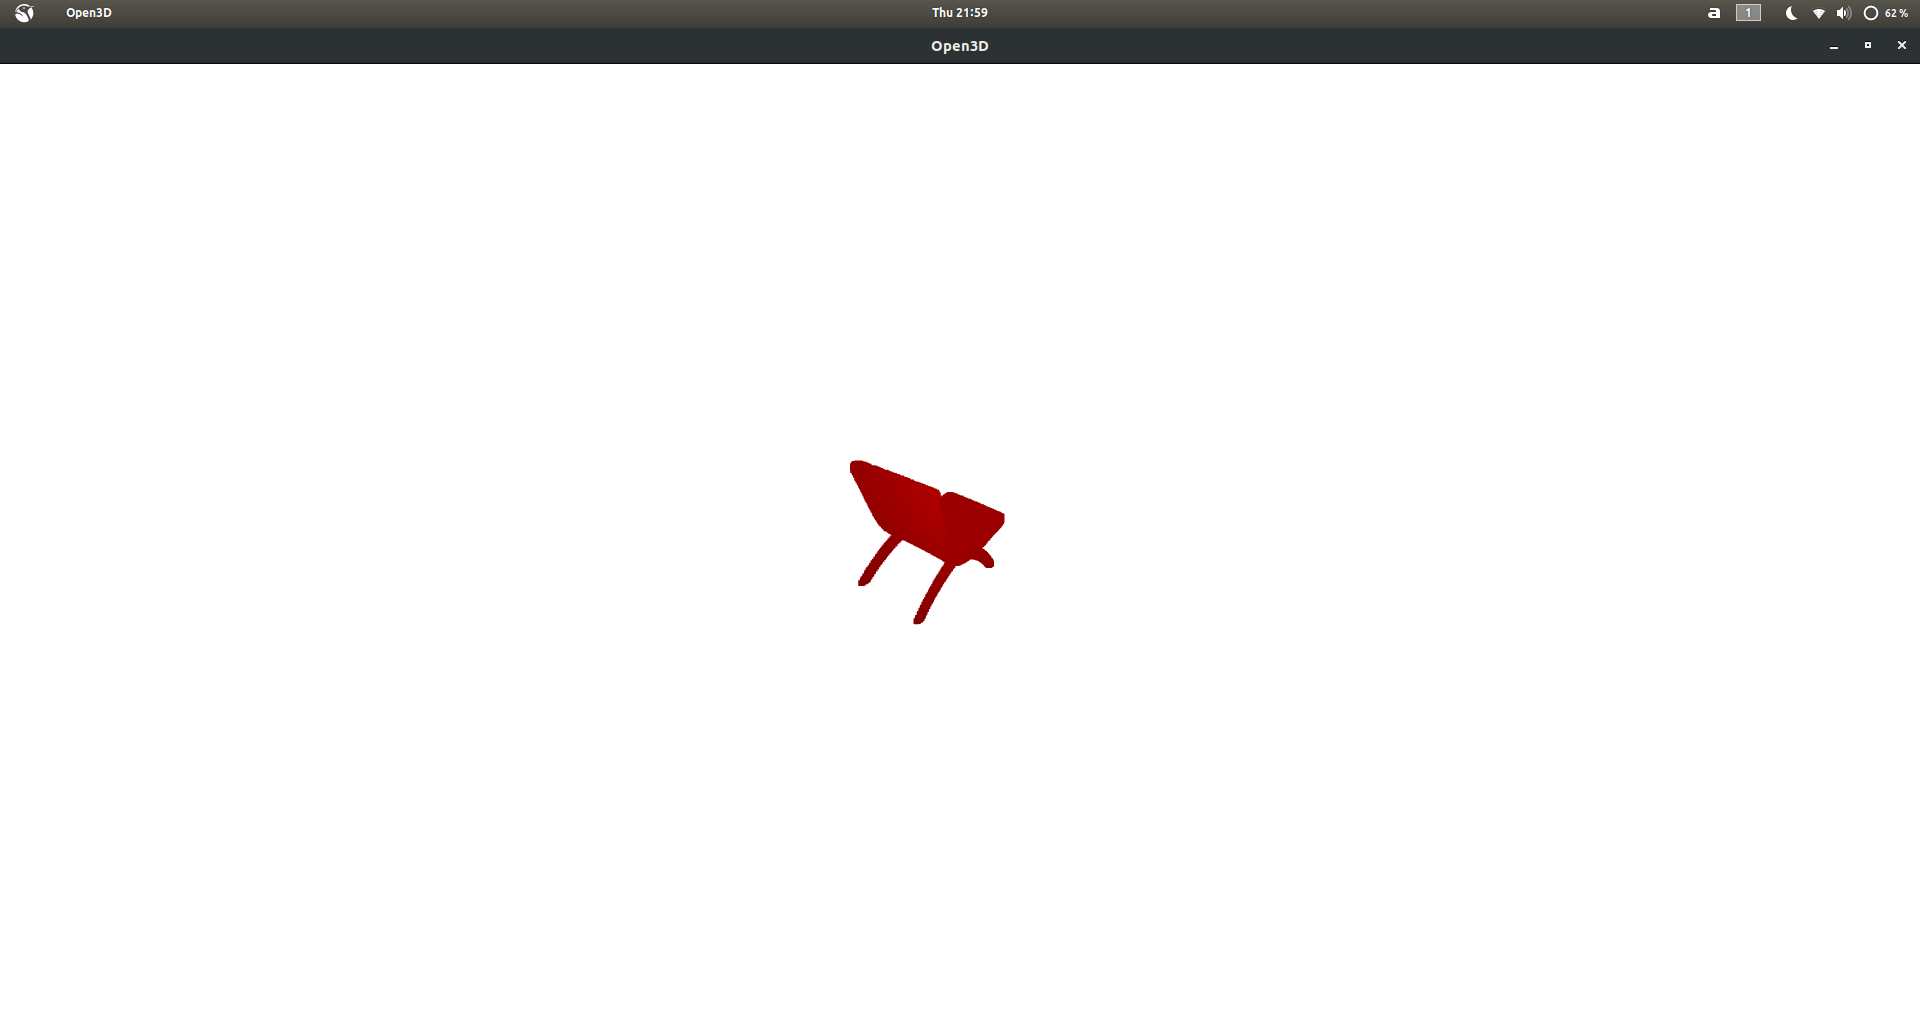

In [3]:
from IPython.display import Image
Image("chair.png")

# **2. Higher dimension least-square**

#### **(a) Using the points given, setup a system of linear equations in the form $\mathbf    {A}\vec{x} = b$ that you can use to solve for the polynomial.**
#### **Hint: Any cubic function can be described as $ax^3 + bx^2 + cx + d$ for some $a, b, c, d$.**

 \begin{array}{c | c}
 x & y \\
 \hline
 1 & 8 \\
 2 & 12 \\
 3 & 10  \\
 4 & -4  \\
\end{array}
 

**Begin (a)**  
\begin{equation}
\begin{pmatrix}
    1 & 1 & 1 & 1 \\
    8 & 4 & 2 & 1 \\
    27 & 9 & 3 & 1 \\
    48 & 16 & 4 & 1 
\end{pmatrix}
\begin{pmatrix}
    a \\ b \\ c \\ d
\end{pmatrix} = 
\begin{pmatrix}
    8 \\ 12 \\ 10 \\ -4
\end{pmatrix}
\end{equation}

#### **(b) Decompose the A matrix you constructed in the previous part using QR decomposition.**

**QR factorization using cholesky**

Begin assuming $QR$
\begin{equation}
A = QR
\end{equation}  

since $Q^\top Q = I$
\begin{equation}
A^\top A = R^TR
\end{equation}  

Since $R$ is upper triangular $R^\top$ is lower triangular.
Preforming the previous matrix multiplications we get the following equations to solve (some of them). Letting $a_{ij}$ be the components of $A^\top A$
\begin{equation}
r_{11}^2 = a_{11} \\
r_{21}r_{11} = a_{21} \\
\dots
\end{equation}  

Then once we've solved for the components of $R$. And $R$ being upper diagonal has an inverse.
\begin{equation}
Q = R^{-1}A
\end{equation}

In [8]:
# Using Julia (why would anyone use python?)
using LinearAlgebra
A = [1 1 1 1;
     8 4 2 1;
     27 9 3 1;
     48 16 4 1]

R = cholesky(A'*A).U
Q = A*inv(R)
display(R)
display(Q)
Q*R

4×4 UpperTriangular{Float64,Array{Float64,2}}:
 55.6597  18.7568   5.21023   1.50917 
   ⋅       1.47674  1.53882   1.14624 
   ⋅        ⋅       0.696774  0.535327
   ⋅        ⋅        ⋅        0.349215

4×4 Array{Float64,2}:
 0.0179663   0.448968    0.3093     0.838116
 0.143731    0.883071   -0.15465   -0.419058
 0.485091   -0.0668861   0.825932  -0.279372
 0.862384   -0.118909   -0.445256   0.209529

4×4 Array{Float64,2}:
  1.0   1.0  1.0  1.0
  8.0   4.0  2.0  1.0
 27.0   9.0  3.0  1.0
 48.0  16.0  4.0  1.0

#### **(c) How would you update your setup in part (a)? How can we solve this system?**

I would use least squares

# **3. Dynamical system as linear equation**

#### **(a) Assuming that $A$ is diagonalizable show that $\exists P,\ \lambda_1 \geq \dots \geq \lambda_m$    , such that**  
\begin{equation}
x_{k+1} = P \begin{bmatrix}
      1 + \lambda_1 \Delta t    &0       &\dots  &0\\
      0      &1 + \lambda_2 \Delta t     &       &\vdots\\
      \vdots &        &\ddots &0\\ 
      0      &\dots   &0      & 1 + \lambda_m \Delta t
  \end{bmatrix} P^{-1}  x_k
\end{equation}


\begin{equation}
x_{k+1} = (A\Delta t + I)x_k \\
 = (PDP^{-1} \Delta t + I) x_k \\
 = (P\Delta t D P^{-1} + PP^{-1})x_k \\
 = P(\Delta t D + I) P^{-1}x_k
\end{equation}  

Showing result

#### **(b) Show that** 
\begin{equation}
x(t) = P\begin{bmatrix}
    1 + \lambda_1 \frac{t}{n}    &0       &\dots  &0\\
    0      &1 + \lambda_2 \frac{t}{n}     &       &\vdots\\
    \vdots &        &\ddots &0\\ 
    0      &\dots   &0      & 1 + \lambda_m \frac{t}{n}
\end{bmatrix}^n P^{-1} x_0
\end{equation}

Follows from the definition of $\Delta t$, which is equal to $\frac{t}{n}$, and recursion  
\begin{equation}
\text{let $D' = \frac{t}{n} t D + I$} \\
\implies x_{k} = PD'P^{-1}x_{k-1} \\
    = PD'P^{-1} PD'P^{-1}x_{k-2} = PD'^2P^{-1}x_{k-2} \\
    = \dots \\
    = PD'^kP^{-1}x_0 \\
\implies \boxed{x(t) = PD'^nP^{-1}x_0} \\
\text{final solution after $n$ steps are taken}
\end{equation}

#### **(c) Show that, for $n\in \mathbb{N}$ big enough, $\forall a\in \mathbb{R}$, $(1+\frac{a}{n})^n = e^    {n \ln (1+\frac{a}{n})}$. State the values of $n$ for which the equality is true.**  

#### *Hint:* Recall that $\ln(x)$ is not defined for some value of $x$

\begin{align}
(1+\frac{a}{n})^n &= e^ {\ln (1+\frac{a}{n})^n} && \text{where $e^{ln(x)} = x$ by definition of $ln$} \\
&= e^    {n \ln (1+\frac{a}{n})} && \text{by properties of $ln$}
\end{align}

case 1: $a < 0$  
\begin{equation}
\implies |\frac{a}{n}| < 1 \\
|n| > |a|
\end{equation}

case 2: $a \geq 0$  
\begin{equation}
\text{valid for all $n$}
\end{equation}

#### **(d) Using the fact that $\ln (1+\frac{a}{n}) \sim \frac{a}{n}$ when $n\rightarrow\infty$, show that     $\lim\limits_{n\rightarrow\infty}(1+\frac{a}{n})^n = e^a$.**  

\begin{equation}
\lim\limits_{n\rightarrow\infty}(1+\frac{a}{n})^n = \lim\limits_{n\rightarrow\infty}e^{n \ln (1+\frac{a}{n})} \\
    =  e^{n\frac{a}{n}} \\
    = e^a
\end{equation}

#### **(e) Show that**  
\begin{equation}
\lim\limits_{n\rightarrow\infty} x(t) = P \begin{bmatrix}
     e^{\lambda_1 t}    &0       &\dots  &0\\
     0      & e^{\lambda_2 t}     &       &\vdots\\
     \vdots &        &\ddots &0\\ 
     0      &\dots   &0      & e^{\lambda_m t}
 \end{bmatrix} P^{-1}  x_0
\end{equation}

From part (b) the diagonal entries of $A$ are of the form $ (1 + \lambda \frac{t}{n} )^n $  
Then from part (d), letting $a = \lambda t$, as $n\rightarrow\infty$,  
the diagonal entries take on the form $e^{\lambda t}$  

proving the result

#### **(f) Show that an equilibrium point exists if and only if $\forall x\in N(A^\top),\ x^\top Bu = 0$.**

#### *Hint:* You might show first that if $Ax_{eq}=-Bu$ then $\forall x \in N(A^\top), x^\top Bu=0$    . Then, you might use the fundamental theorem of linear algebra.

First note that $\forall x\in N(A^\top) \implies A^Tx = 0 \implies x^TA = 0$  

\begin{equation}
0 = Ax_{eq} + Bu \\
\iff Ax_{eq} = -Bu \\
\iff x^TAx_{eq} = -x^TBu \\
\iff -x^TBu = 0 \text{           } \forall x \in N(A^\top)
\end{equation}

#### **(g) Let $u$ and $x_{eq}$ such that $0 = Ax_{eq} + Bu$. Let $x(0) = x_0$ and $\lambda_1<0$. Show tha    t $\lim\limits_{t\rightarrow\infty}x(t) = x_{eq}$.**

\begin{align*}
x_{k+1} &= x_{k} + \Delta t A x_{k} + \Delta tBu \\
 &= P(I+\frac{t}{n}D)P^{-1}x_k + \frac{t}{n}Bu \\
 &= PD'P^{-1}x_k + \frac{t}{n}Bu  \\
& \text{at some point we reach equilibrium} \\
x_{eq} &= x_{k+1} = PD'P^{-1}x_k + \frac{t}{n}Bu \\
x_{k+2} &= PD'P^{-1}x_{eq} + \frac{t}{n}Bu = 0 \\
    &= x_{k+3} = \dots = x_n \\
    & \text{as $n\rightarrow\infty$} \\
    &= x(t) = PIP^{-1}x_{eq} \\
    &= x_{eq} \\
    & \text{as $t\rightarrow\infty$} \\
    &= x_{eq}
\end{align*}  
Where the diaganol entries of $D'$ being equal to $1+\frac{t}{n}\lambda \implies$ as $n\rightarrow\infty$ diagonal entries become 1

#### **(h) Let consider $A=(-1)$, $x_0 = 10$ and $u=0$, what is $x(t)$ (using e.)?**

Since $A$ is already diagonal  
\begin{equation}
\lim\limits_{t\rightarrow\infty} x(t) = \lim\limits_{t\rightarrow\infty}\lim\limits_{n\rightarrow\infty}(1 - 1\frac{t}{n})^nx_0 \\
 = \lim\limits_{t\rightarrow\infty}(e^{-t})x_0 \\
 = 0
\end{equation}

#### **(i) Let consider the following system: $\ddot{y} = -\omega^2 y $. Let $X = \begin{bmatrix} y \\ \dot{y} \end{bmatrix}$. We have that  $\dot{X} = \begin{bmatrix} \dot{y} \\ \ddot{y} \end{bmatrix}$.**  Give $A$ a $2\times 2$ matrix such that $\dot{X} = A X$. Also, write the matrix in the notebook ``Dynamical system.ipynb''.

**Answer:**  \begin{equation}
A = 
\begin{pmatrix}
0 & 1 \\ -\omega ^2 & 0
\end{pmatrix}
\end{equation}

#### **(j) Assume that $\lambda$ is an eigenvalue of $A$, show that it implies that $\lambda^2=-\omega^2$.**

Subtract $\lambda$ from the diagonal
\begin{equation}
\begin{pmatrix}
-\lambda & 1 \\ -\omega ^2 & -\lambda
\end{pmatrix}
\end{equation}

Then take the determinant
\begin{equation}
\lambda^2 + \omega^2 = 0 \\
\implies \lambda^2 = -\omega^2
\end{equation}

#### **(k)** 

In notebook